<a href="https://colab.research.google.com/github/allanbraquiel/Notebooks/blob/master/Sobreviventes_do_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Verificando os valores null no dataset

In [0]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Criando um dicionário com a moda das idades, SC para cabines e a moda em Embarked para preencher os valores null nas colunas

In [0]:
values = {"Age": df.Age.mode()[0], "Cabin": "SC", "Embarked": df.Embarked.mode()[0]}

In [0]:
df.fillna(value=values, inplace=True)

Verificando os valores null novamente

In [0]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [0]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,SC,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,SC,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,SC,S


Alterando o index para PassengerId

In [0]:
df.set_index("PassengerId", inplace=True)

In [0]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,SC,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,SC,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,SC,S


Verificando os tipos de dados do dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Alterando o tipo de dados para categoricos para diminuir oespaço na memória

In [0]:
df.Sex = df.Sex.astype("category")
df.Embarked = df.Embarked.astype("category")
df.Survived = df.Survived.astype("category")
df.Pclass = df.Pclass.astype("category")
df.Parch = df.Parch.astype("int32")
df.SibSp = df.SibSp.astype("int32")
df.Age = df.Age.astype("int32")

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    int32   
 5   SibSp     891 non-null    int32   
 6   Parch     891 non-null    int32   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     891 non-null    object  
 10  Embarked  891 non-null    category
dtypes: category(4), float64(1), int32(3), object(3)
memory usage: 49.1+ KB


Quantidade de Sobreviventes 0 - não sobreviveu; 1 - Sobreviveu

In [0]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

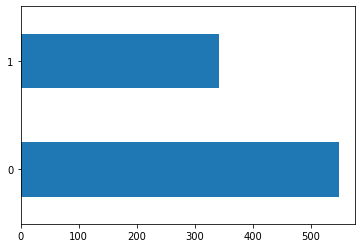

In [0]:
df.Survived.value_counts().plot.barh()

Quantidade de pessoas por classe

In [0]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

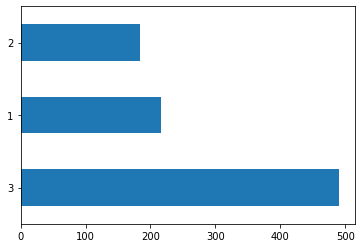

In [0]:
df.Pclass.value_counts().plot.barh()

Média das idades das pessoas por sexo

In [0]:
df.groupby(by="Sex")["Age"].mean()

Sex
female    27.245223
male      29.261698
Name: Age, dtype: float64

In [0]:
df.groupby(by="Survived").count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342,342,342


Média das idades agrupado por sexo e sobrevivencia

In [0]:
df.groupby(["Sex", "Survived"]).agg({"Age": np.mean})

Age
Sex    Survived           
female 0         24.814815
       1         28.090129
male   0         29.844017
       1         26.761468

Média das idades agrupado por sexo, sobrevivencia e classe

In [0]:
df.groupby(["Sex", "Survived", "Pclass"]).agg({"Age": np.mean})

Age
Sex    Survived Pclass           
female 0        1       25.666667
                2       36.000000
                3       23.847222
       1        1       33.857143
                2       27.957143
                3       20.930556
male   0        1       40.298701
                2       32.637363
                3       26.313333
       1        1       34.866667
                2       16.823529
                3       22.595745

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


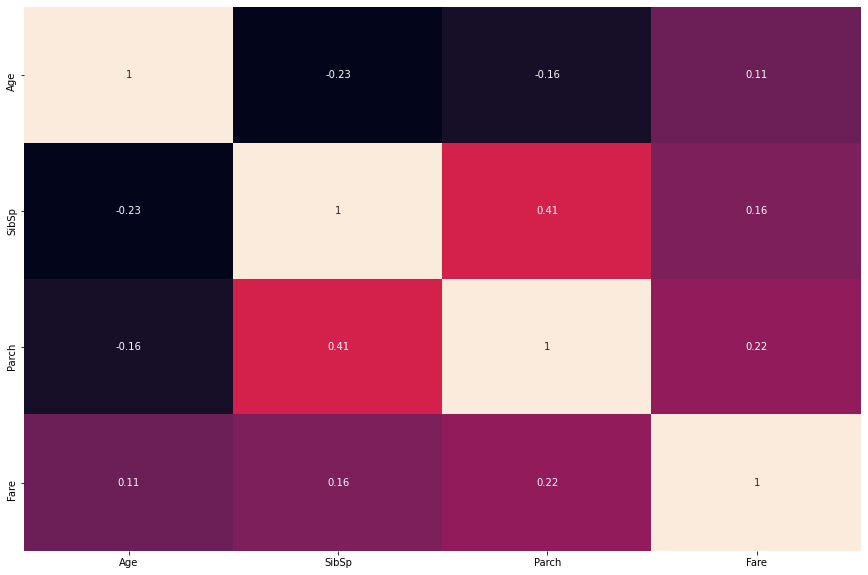

In [0]:
df_correlacao = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df_correlacao, annot=True, cbar=False)
#sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', square=True. linecolor='white', annot=True)
plt.show()

In [0]:
x_data = df.drop(["Survived", "Name", "Ticket", "Cabin", "Fare"], axis=1)
y_data = df["Survived"]

In [0]:
x_data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,male,22,1,0,S
2,1,female,38,1,0,C


plicando o Label Encoder para codificação de variaveis categoricas

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()

In [0]:
x_data.Sex = label_encoder1.fit_transform(x_data.Sex)
x_data.Embarked = label_encoder2.fit_transform(x_data.Embarked)

In [0]:
x_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,1,22,1,0,2
2,1,0,38,1,0,0
3,3,0,26,0,0,2
4,1,0,35,1,0,2
5,3,1,35,0,0,2


In [0]:
y_data.head(5)

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [0]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    category
 1   Sex       891 non-null    int64   
 2   Age       891 non-null    int32   
 3   SibSp     891 non-null    int32   
 4   Parch     891 non-null    int32   
 5   Embarked  891 non-null    int64   
dtypes: category(1), int32(3), int64(2)
memory usage: 72.3 KB


In [0]:
x_data.Pclass = x_data.Pclass.astype("int32")

In [0]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [0]:
x_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,1,22,1,0,2
2,1,0,38,1,0,0
3,3,0,26,0,0,2
4,1,0,35,1,0,2
5,3,1,35,0,0,2


In [0]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,1.0,1.0,0.2750,0.125,0.0,1.0
2,0.0,0.0,0.4750,0.125,0.0,0.0
3,1.0,0.0,0.3250,0.000,0.0,1.0
4,0.0,0.0,0.4375,0.125,0.0,1.0
5,1.0,1.0,0.4375,0.000,0.0,1.0


Separando os dados de treino e teste

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_data, test_size=0.3, random_state=43)

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (623, 6)
x test:  (268, 6)
y train:  (623,)
y test:  (268,)


Usandoo KNN para classificação

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17, p=12)
knn.fit(x_train, y_train)
labels = knn.predict(x_test)
print(len(labels))

268


In [0]:
knn.score(x_test, y_test)

0.7835820895522388

Usando redes neurais com o MLPClassifier

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
predictions = mlp.predict(x_test)
print(predictions)
print("Score: ", mlp.score(x_test, y_test))

[0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0]
Score:  0.7947761194029851


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[148  16]
 [ 39  65]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       164
           1       0.80      0.62      0.70       104

    accuracy                           0.79       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.80      0.79      0.79       268

